# Students placement dataset EDA

In [247]:
import pandas as pd

df = pd.read_csv("data.csv")

In [248]:
df.head()

,name,city,gender,profession,age,cgpa,placed
0,moriarity,NaN,female,phd,28.0,5.94,1
1,moriarity,asgard,NaN,bachelor,50.0,8.55,0
2,holmes,NaN,female,masters,18.0,5.56,0
3,sam,NaN,male,bachelor,25.0,8.57,1
4,sam,NaN,male,bachelor,19.0,8.76,1


In [249]:
df.shape

(1100, 7)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        1009 non-null   object 
 1   city        905 non-null    object 
 2   gender      994 non-null    object 
 3   profession  921 non-null    object 
 4   age         982 non-null    float64
 5   cgpa        962 non-null    float64
 6   placed      1100 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 60.3+ KB


<Axes: >

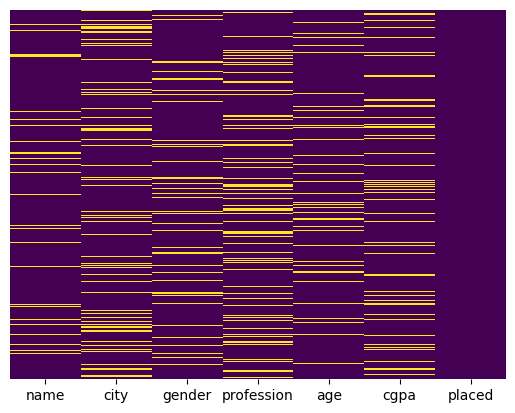

In [251]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [252]:
df.describe()

,age,cgpa,placed
count,982.000000,962.000000,1100.000000
mean,28.429735,7.609033,0.499091
std,9.141244,1.495991,0.500227
min,18.000000,4.010000,0.000000
25%,22.000000,7.170000,0.000000
50%,26.000000,7.925000,0.000000
75%,30.000000,8.760000,1.000000
max,50.000000,9.490000,1.000000


In [253]:
df.nunique()

name            8
city            4
gender          2
profession      3
age            24
cgpa          363
placed          2
dtype: int64

In [254]:
feature_names = df.columns.tolist()
for column in feature_names:
    print(column)
    print("----------------------------------")
    print(df[column].value_counts(dropna=False))
    print("==================================")

name
----------------------------------
name
moriarity    280
sam          257
holmes       163
dean          97
NaN           91
bobby         83
watson        68
sherlock      48
castiel       13
Name: count, dtype: int64
city
----------------------------------
city
wakanda       391
gotham        243
NaN           195
asgard        152
purgatory     119
Name: count, dtype: int64
gender
----------------------------------
gender
male      760
female    234
NaN       106
Name: count, dtype: int64
profession
----------------------------------
profession
bachelor    517
masters     273
NaN         179
phd         131
Name: count, dtype: int64
age
----------------------------------
age
NaN     118
28.0     68
30.0     68
25.0     65
19.0     64
27.0     63
21.0     62
24.0     59
26.0     58
29.0     58
23.0     57
22.0     56
20.0     52
18.0     52
47.0     26
43.0     25
45.0     21
41.0     19
50.0     18
46.0     18
44.0     18
49.0     16
40.0     15
48.0     12
42.0     12
Name: co

## Выделение целевой переменной

In [255]:
features = df.drop('placed', axis=1)
labels = df['placed']
print(features.head())

        name    city  gender profession   age  cgpa
0  moriarity     NaN  female        phd  28.0  5.94
1  moriarity  asgard     NaN   bachelor  50.0  8.55
2     holmes     NaN  female    masters  18.0  5.56
3        sam     NaN    male   bachelor  25.0  8.57
4        sam     NaN    male   bachelor  19.0  8.76


## Чистка датасета

### Обработка пропусков данных

In [256]:
def print_missing_values(df):
    missing_counts = df.isnull().sum()
    print(missing_counts)

print_missing_values(df)

name           91
city          195
gender        106
profession    179
age           118
cgpa          138
placed          0
dtype: int64


In [257]:
df['name'].fillna('unknown', inplace=True)
print_missing_values(df)

name            0
city          195
gender        106
profession    179
age           118
cgpa          138
placed          0
dtype: int64


C:\Users\danii\AppData\Local\Temp\ipykernel_24596\3360007512.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('unknown', inplace=True)


In [258]:
df['city'].fillna('unknown', inplace=True)
print_missing_values(df)

name            0
city            0
gender        106
profession    179
age           118
cgpa          138
placed          0
dtype: int64


C:\Users\danii\AppData\Local\Temp\ipykernel_24596\1293763835.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['city'].fillna('unknown', inplace=True)


In [259]:
df['gender'].fillna('unknown', inplace=True)
df['profession'].fillna('unknown', inplace=True)
df['age'] = df['age'].fillna(df['age'].mean())
df['cgpa'] = df['cgpa'].fillna(df['cgpa'].mean())
print_missing_values(df)


name          0
city          0
gender        0
profession    0
age           0
cgpa          0
placed        0
dtype: int64


C:\Users\danii\AppData\Local\Temp\ipykernel_24596\148483356.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna('unknown', inplace=True)
C:\Users\danii\AppData\Local\Temp\ipykernel_24596\148483356.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

### Обнаружение выбросов

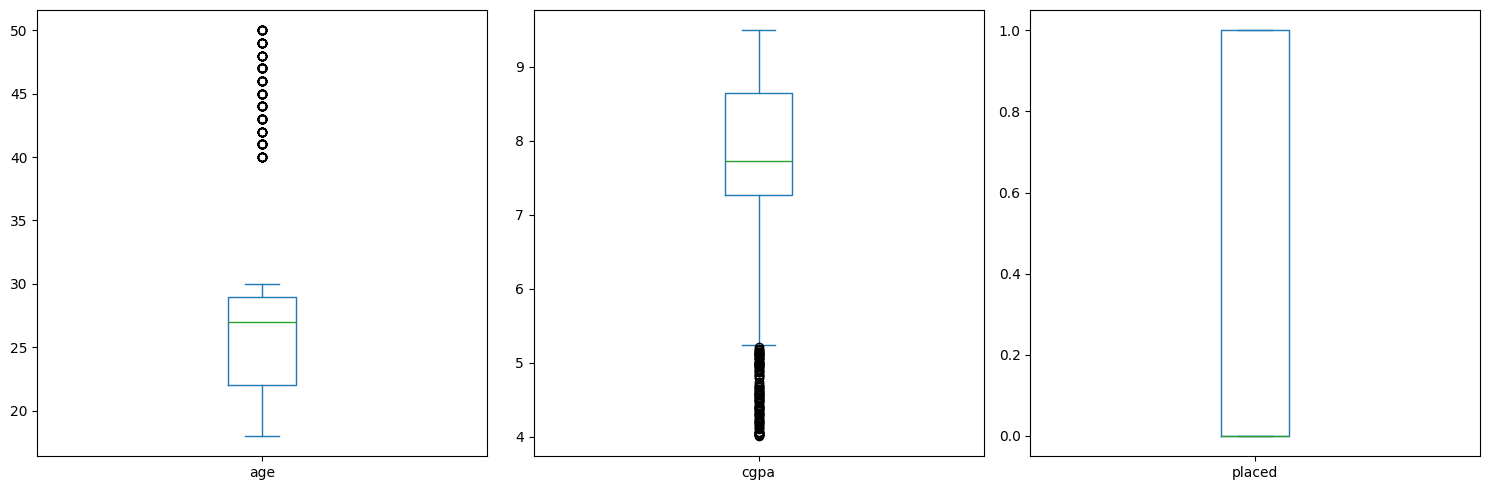

In [260]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].plot(kind='box', subplots=True, layout=(1, len(numeric_cols)), figsize=(5 * len(numeric_cols), 5), sharey=False)
plt.tight_layout()
plt.show()


In [261]:
df.describe(include='all')

,name,city,gender,profession,age,cgpa,placed
count,1100,1100,1100,1100,1100.000000,1100.000000,1100.000000
unique,9,5,3,4,NaN,NaN,NaN
top,moriarity,wakanda,male,bachelor,NaN,NaN,NaN
freq,280,391,760,517,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,28.429735,7.609033,0.499091
std,NaN,NaN,NaN,NaN,8.636563,1.398916,0.500227
min,NaN,NaN,NaN,NaN,18.000000,4.010000,0.000000
25%,NaN,NaN,NaN,NaN,22.000000,7.270000,0.000000
50%,NaN,NaN,NaN,NaN,27.000000,7.730000,0.000000
75%,NaN,NaN,NaN,NaN,29.000000,8.640000,1.000000


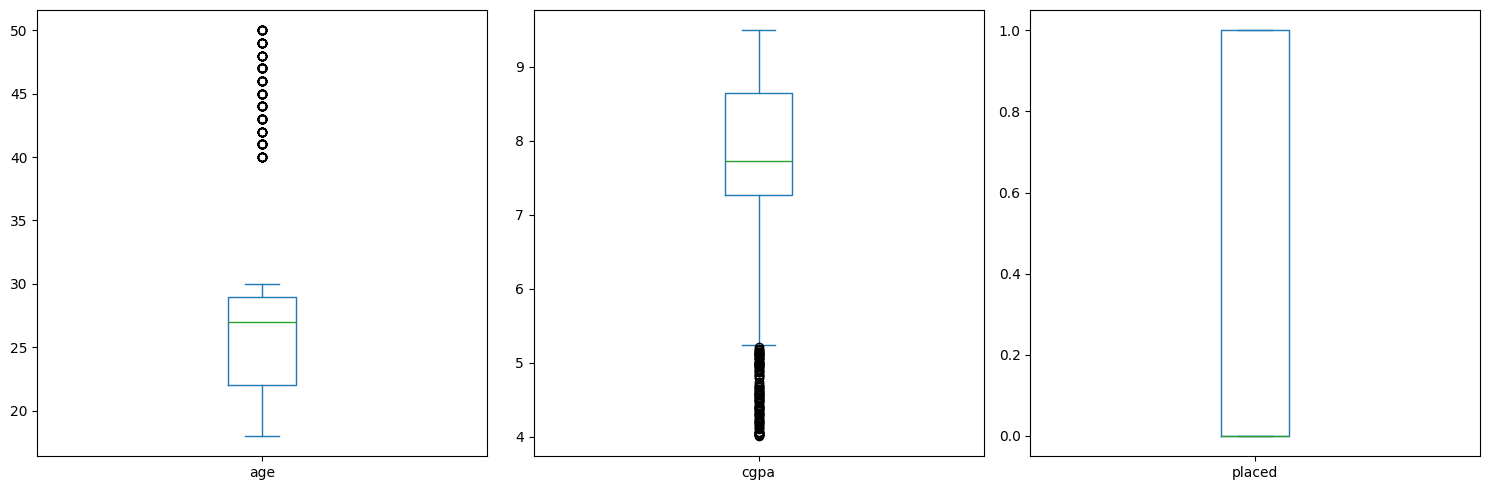

In [262]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].plot(kind='box', subplots=True, layout=(1, len(numeric_cols)), figsize=(5 * len(numeric_cols), 5), sharey=False)
plt.tight_layout()
plt.show()

In [263]:
# df['cgpa'] = df['cgpa'].clip(lower=5, upper=9)


In [264]:
# numeric_cols = df.select_dtypes(include='number').columns
# df[numeric_cols].plot(kind='box', subplots=True, layout=(1, len(numeric_cols)), figsize=(5 * len(numeric_cols), 5), sharey=False)
# plt.tight_layout()
# plt.show()

In [265]:
# df.describe(include='all')

In [266]:
df['age'].isna().sum()

np.int64(0)

In [267]:
print(df.isna().sum())


name          0
city          0
gender        0
profession    0
age           0
cgpa          0
placed        0
dtype: int64


In [268]:
df['city'].fillna('unknown', inplace=True)
df['city'].isna().sum()

C:\Users\danii\AppData\Local\Temp\ipykernel_24596\3711957750.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['city'].fillna('unknown', inplace=True)


np.int64(0)

In [269]:
df['gender'].fillna('unknown', inplace=True)
df['gender'].isna().sum()

C:\Users\danii\AppData\Local\Temp\ipykernel_24596\216788189.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna('unknown', inplace=True)


np.int64(0)

In [270]:
df['profession'].fillna('unknown', inplace=True)
df['profession'].isna().sum()

C:\Users\danii\AppData\Local\Temp\ipykernel_24596\764807980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['profession'].fillna('unknown', inplace=True)


np.int64(0)

In [271]:
print(df.isna().sum())

name          0
city          0
gender        0
profession    0
age           0
cgpa          0
placed        0
dtype: int64


In [272]:
df['cgpa'] = df['cgpa'].fillna(0)

In [273]:
print(df.isna().sum())

name          0
city          0
gender        0
profession    0
age           0
cgpa          0
placed        0
dtype: int64


In [274]:
df.describe(include='all')

,name,city,gender,profession,age,cgpa,placed
count,1100,1100,1100,1100,1100.000000,1100.000000,1100.000000
unique,9,5,3,4,NaN,NaN,NaN
top,moriarity,wakanda,male,bachelor,NaN,NaN,NaN
freq,280,391,760,517,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,28.429735,7.609033,0.499091
std,NaN,NaN,NaN,NaN,8.636563,1.398916,0.500227
min,NaN,NaN,NaN,NaN,18.000000,4.010000,0.000000
25%,NaN,NaN,NaN,NaN,22.000000,7.270000,0.000000
50%,NaN,NaN,NaN,NaN,27.000000,7.730000,0.000000
75%,NaN,NaN,NaN,NaN,29.000000,8.640000,1.000000


### Кодирование данных


In [275]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(features['city'])
label_encoder.transform(features['city'])
label_encoder.fit(features['gender'])
label_encoder.transform(features['gender'])
label_encoder.fit(features['profession'])
label_encoder.transform(features['profession'])

features['city'] = label_encoder.fit_transform(features['city'])
features['gender'] = label_encoder.fit_transform(features['gender'])
features['profession'] = label_encoder.fit_transform(features['profession'])



### Зависимости в данных

            city  gender  profession   age  cgpa
city        1.00   -0.02       -0.01  0.03  0.02
gender     -0.02    1.00        0.01  0.00  0.02
profession -0.01    0.01        1.00 -0.02  0.02
age         0.03    0.00       -0.02  1.00 -0.06
cgpa        0.02    0.02        0.02 -0.06  1.00


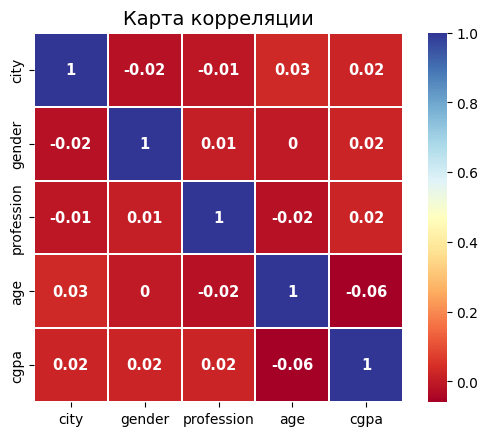

In [276]:
import numpy as np
var_corr = round(features.corr(numeric_only=True),2)
print(var_corr)
mask = np.zeros_like(var_corr)
sns.heatmap(var_corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("RdYlBu")
                , linewidths=.1)
plt.title('Карта корреляции', fontsize=14)
plt.show()

### Нормализация данных

In [277]:
#нормализация на стандартное отклонение
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features[['age']]=scale_features_std.fit_transform(features[['age']])
print(features.head())

        name  city  gender  profession       age  cgpa
0  moriarity     4       0           2 -0.047035  5.94
1  moriarity     0       2           0  2.360866  8.55
2     holmes     4       0           1 -1.141535  5.56
3        sam     4       1           0 -0.375385  8.57
4        sam     4       1           0 -1.032085  8.76


### Разделение данных для обучения и тестирования

In [279]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state = 0)

print(features.shape)
print(features_train.shape)
print(features_test.shape)

(1100, 6)
(880, 6)
(220, 6)
